In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [18]:
iris = load_iris(return_X_y=True, as_frame=True)
data = iris[0]
target = iris[1]
df = pd.concat([data, target], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
df = df.iloc[:100, [0, 2, -1]]
df.head()

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [20]:
df.shape

(100, 3)

In [21]:
X = df.iloc[:,[0,1]].values
y = df.iloc[:, -1].values

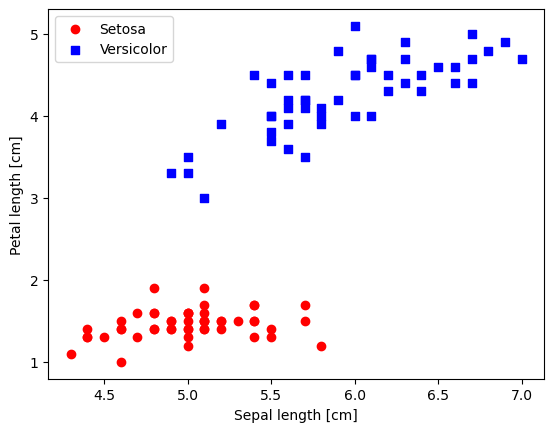

In [22]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [11]:
Y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
"""
y = np.where(Y.iloc[50:150].values)
x=df.iloc[0:150,[0,2]].values
plt.scatter(x[0:50,0],x[0:50,1],color='blue',marker='s',label='Iris-setosa')
plt.scatter(x[100:150,0],x[100:150,1],color='green',marker='o',label='Iris-verginica')
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc= 'upper left')
plt.show()
"""

"\ny = np.where(Y.iloc[50:150].values)\nx=df.iloc[0:150,[0,2]].values\nplt.scatter(x[0:50,0],x[0:50,1],color='blue',marker='s',label='Iris-setosa')\nplt.scatter(x[100:150,0],x[100:150,1],color='green',marker='o',label='Iris-verginica')\nplt.xlabel('sepal lenght [cm]')\nplt.ylabel('petal lenght [cm]')\nplt.legend(loc= 'upper left')\nplt.show()\n"

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=123)

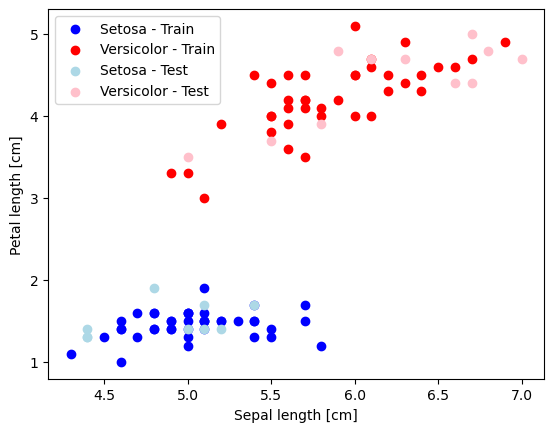

In [24]:
import matplotlib.pyplot as plt

# Create a scatter plot for training data
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='blue', label='Setosa - Train')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='red', label='Versicolor - Train')

# Create a scatter plot for testing data, make them a bit grayish
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], color='lightblue', label='Setosa - Test')
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], color='pink', label='Versicolor - Test')

# Add labels and legend
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [29]:

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # initialize weights and bias
        # we want weights to have the length of the number of features because we have w for each feature
        self.weights = np.random.random(n_features)
        self.bias = 0
        
        max_label = np.max(y) # Finds the maximum label in the 'y' array (original labels)
        y_ = np.array([1 if i == max_label else 0 for i in y]) # Transforms labels in 'y' to binary
        
        for iter in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                
                # Perceptron update rule
                update = self.learning_rate * (y_predicted - y_[idx])
                
                self.weights = self.weights - update * x_i
                self.bias = self.bias - update
        
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted
    
    def activation_function(self, x):
        return np.where(x>=0, 1, 0)

In [30]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [31]:
model = Perceptron()
model.fit(X_train, y_train)

In [32]:
model.weights

array([-0.03449943,  0.15760361])

In [33]:
model.bias

-0.13999999999999999

In [34]:
predictions = model.predict(X_test)

In [35]:
print(f'Perceptron classification accuracy: {accuracy(y_test, predictions)}')


Perceptron classification accuracy: 1.0
